In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CMI
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


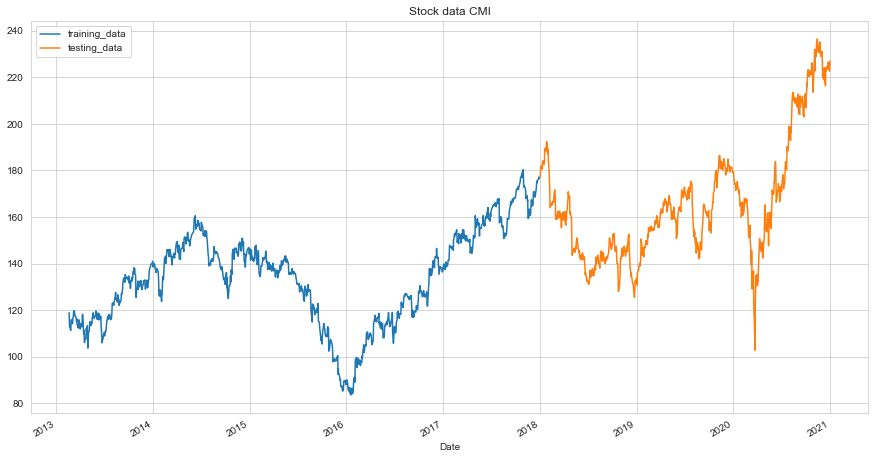

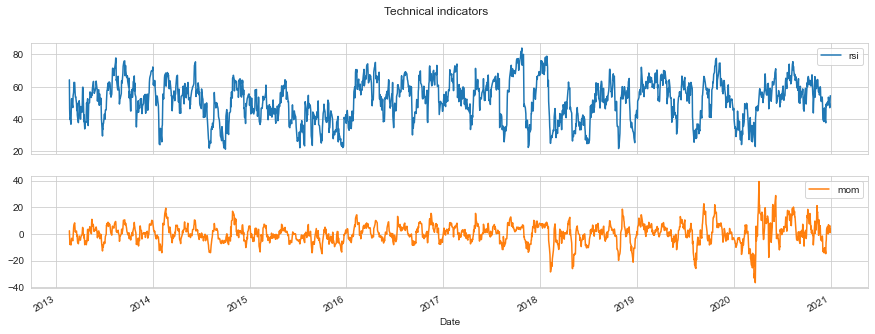

In [2]:
stock_name = 'cmi'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1277.12, duration: 0:00:00.240057
episode: 2/2000, episode end value: 1141.47, duration: 0:00:00.245055
episode: 3/2000, episode end value: 1253.45, duration: 0:00:00.217049
episode: 4/2000, episode end value: 1461.06, duration: 0:00:00.197908
episode: 5/2000, episode end value: 1250.92, duration: 0:00:00.192599
episode: 6/2000, episode end value: 1385.53, duration: 0:00:00.207619
episode: 7/2000, episode end value: 1256.69, duration: 0:00:00.200029
episode: 8/2000, episode end value: 1337.48, duration: 0:00:00.200045
episode: 9/2000, episode end value: 1362.35, duration: 0:00:00.184040
episode: 10/2000, episode end value: 1347.39, duration: 0:00:00.168554
episode: 11/2000, episode end value: 1244.60, duration: 0:00:00.222573
episode: 12/2000, episode end value: 1272.21, duration: 0:00:00.227954
episode: 13/2000, episode end value: 1248.31, duration: 0:00:00.200270
episode: 14/2000, episode end value: 1348.79, duration: 0:00:00.191596
episode: 15/200

episode: 117/2000, episode end value: 1359.61, duration: 0:00:00.264878
episode: 118/2000, episode end value: 1257.28, duration: 0:00:00.249496
episode: 119/2000, episode end value: 1277.76, duration: 0:00:00.298063
episode: 120/2000, episode end value: 1241.93, duration: 0:00:00.251838
episode: 121/2000, episode end value: 1265.57, duration: 0:00:00.261849
episode: 122/2000, episode end value: 1252.93, duration: 0:00:00.276786
episode: 123/2000, episode end value: 1237.66, duration: 0:00:00.259572
episode: 124/2000, episode end value: 1305.91, duration: 0:00:00.219186
episode: 125/2000, episode end value: 1358.71, duration: 0:00:00.253751
episode: 126/2000, episode end value: 1250.34, duration: 0:00:00.265822
episode: 127/2000, episode end value: 1251.49, duration: 0:00:00.273752
episode: 128/2000, episode end value: 1360.90, duration: 0:00:00.250989
episode: 129/2000, episode end value: 1248.43, duration: 0:00:00.245564
episode: 130/2000, episode end value: 1262.12, duration: 0:00:00

episode: 231/2000, episode end value: 1288.58, duration: 0:00:00.221096
episode: 232/2000, episode end value: 1233.27, duration: 0:00:00.289363
episode: 233/2000, episode end value: 1259.14, duration: 0:00:00.319413
episode: 234/2000, episode end value: 1264.24, duration: 0:00:00.342346
episode: 235/2000, episode end value: 1246.85, duration: 0:00:00.322566
episode: 236/2000, episode end value: 1258.42, duration: 0:00:00.348375
episode: 237/2000, episode end value: 1256.90, duration: 0:00:00.306661
episode: 238/2000, episode end value: 1256.74, duration: 0:00:00.332073
episode: 239/2000, episode end value: 1267.51, duration: 0:00:00.305069
episode: 240/2000, episode end value: 1268.23, duration: 0:00:00.264451
episode: 241/2000, episode end value: 1363.26, duration: 0:00:00.308908
episode: 242/2000, episode end value: 1245.55, duration: 0:00:00.317073
episode: 243/2000, episode end value: 1260.50, duration: 0:00:00.358473
episode: 244/2000, episode end value: 1447.43, duration: 0:00:00

episode: 345/2000, episode end value: 1234.61, duration: 0:00:00.399912
episode: 346/2000, episode end value: 1258.41, duration: 0:00:00.477390
episode: 347/2000, episode end value: 1274.15, duration: 0:00:00.443359
episode: 348/2000, episode end value: 1254.38, duration: 0:00:00.486399
episode: 349/2000, episode end value: 1262.66, duration: 0:00:00.344608
episode: 350/2000, episode end value: 1354.49, duration: 0:00:00.301176
episode: 351/2000, episode end value: 1291.22, duration: 0:00:00.322970
episode: 352/2000, episode end value: 1253.07, duration: 0:00:00.475550
episode: 353/2000, episode end value: 1255.05, duration: 0:00:00.342396
episode: 354/2000, episode end value: 1244.97, duration: 0:00:00.403940
episode: 355/2000, episode end value: 1277.22, duration: 0:00:00.364004
episode: 356/2000, episode end value: 1307.16, duration: 0:00:00.303635
episode: 357/2000, episode end value: 1483.99, duration: 0:00:00.355629
episode: 358/2000, episode end value: 1475.97, duration: 0:00:00

episode: 459/2000, episode end value: 1256.93, duration: 0:00:00.397486
episode: 460/2000, episode end value: 1275.34, duration: 0:00:00.497482
episode: 461/2000, episode end value: 1285.11, duration: 0:00:00.495573
episode: 462/2000, episode end value: 1263.23, duration: 0:00:00.363616
episode: 463/2000, episode end value: 1413.59, duration: 0:00:00.426806
episode: 464/2000, episode end value: 1241.36, duration: 0:00:00.390791
episode: 465/2000, episode end value: 1282.22, duration: 0:00:00.485890
episode: 466/2000, episode end value: 1270.88, duration: 0:00:00.369747
episode: 467/2000, episode end value: 1256.43, duration: 0:00:00.429879
episode: 468/2000, episode end value: 1343.78, duration: 0:00:00.439709
episode: 469/2000, episode end value: 1381.88, duration: 0:00:00.317272
episode: 470/2000, episode end value: 1246.10, duration: 0:00:00.436492
episode: 471/2000, episode end value: 1247.76, duration: 0:00:00.487443
episode: 472/2000, episode end value: 1259.57, duration: 0:00:00

episode: 573/2000, episode end value: 1307.78, duration: 0:00:00.458757
episode: 574/2000, episode end value: 1270.56, duration: 0:00:00.467591
episode: 575/2000, episode end value: 1240.47, duration: 0:00:00.421454
episode: 576/2000, episode end value: 1259.74, duration: 0:00:00.445323
episode: 577/2000, episode end value: 1335.96, duration: 0:00:00.415191
episode: 578/2000, episode end value: 1458.41, duration: 0:00:00.304854
episode: 579/2000, episode end value: 1252.87, duration: 0:00:00.362519
episode: 580/2000, episode end value: 1254.53, duration: 0:00:00.430966
episode: 581/2000, episode end value: 1281.09, duration: 0:00:00.490425
episode: 582/2000, episode end value: 1275.27, duration: 0:00:00.344405
episode: 583/2000, episode end value: 1257.74, duration: 0:00:00.428503
episode: 584/2000, episode end value: 1286.88, duration: 0:00:00.534488
episode: 585/2000, episode end value: 1245.31, duration: 0:00:00.489951
episode: 586/2000, episode end value: 1257.59, duration: 0:00:00

episode: 687/2000, episode end value: 1274.00, duration: 0:00:00.521575
episode: 688/2000, episode end value: 1445.96, duration: 0:00:00.362668
episode: 689/2000, episode end value: 1451.15, duration: 0:00:00.348004
episode: 690/2000, episode end value: 1277.46, duration: 0:00:00.373332
episode: 691/2000, episode end value: 1223.88, duration: 0:00:00.321545
episode: 692/2000, episode end value: 1257.91, duration: 0:00:00.438372
episode: 693/2000, episode end value: 1267.19, duration: 0:00:00.432421
episode: 694/2000, episode end value: 1284.42, duration: 0:00:00.524516
episode: 695/2000, episode end value: 1418.82, duration: 0:00:00.403470
episode: 696/2000, episode end value: 1319.67, duration: 0:00:00.414572
episode: 697/2000, episode end value: 1253.50, duration: 0:00:00.483775
episode: 698/2000, episode end value: 1266.40, duration: 0:00:00.523628
episode: 699/2000, episode end value: 1241.96, duration: 0:00:00.431904
episode: 700/2000, episode end value: 1249.27, duration: 0:00:00

episode: 801/2000, episode end value: 1239.40, duration: 0:00:00.384710
episode: 802/2000, episode end value: 1283.58, duration: 0:00:00.438479
episode: 803/2000, episode end value: 1273.58, duration: 0:00:00.397684
episode: 804/2000, episode end value: 1494.50, duration: 0:00:00.343200
episode: 805/2000, episode end value: 1259.77, duration: 0:00:00.405130
episode: 806/2000, episode end value: 1274.09, duration: 0:00:00.403012
episode: 807/2000, episode end value: 1304.05, duration: 0:00:00.367894
episode: 808/2000, episode end value: 1303.25, duration: 0:00:00.416223
episode: 809/2000, episode end value: 1231.61, duration: 0:00:00.386793
episode: 810/2000, episode end value: 1281.95, duration: 0:00:00.427309
episode: 811/2000, episode end value: 1258.51, duration: 0:00:00.413482
episode: 812/2000, episode end value: 1270.13, duration: 0:00:00.404564
episode: 813/2000, episode end value: 1255.94, duration: 0:00:00.482059
episode: 814/2000, episode end value: 1368.33, duration: 0:00:00

episode: 915/2000, episode end value: 1302.95, duration: 0:00:00.385234
episode: 916/2000, episode end value: 1338.98, duration: 0:00:00.401983
episode: 917/2000, episode end value: 1348.17, duration: 0:00:00.306954
episode: 918/2000, episode end value: 1365.86, duration: 0:00:00.319198
episode: 919/2000, episode end value: 1267.35, duration: 0:00:00.358015
episode: 920/2000, episode end value: 1353.75, duration: 0:00:00.416516
episode: 921/2000, episode end value: 1241.92, duration: 0:00:00.455063
episode: 922/2000, episode end value: 1254.82, duration: 0:00:00.420084
episode: 923/2000, episode end value: 1271.57, duration: 0:00:00.474875
episode: 924/2000, episode end value: 1251.66, duration: 0:00:00.481750
episode: 925/2000, episode end value: 1251.86, duration: 0:00:00.439080
episode: 926/2000, episode end value: 1321.88, duration: 0:00:00.328744
episode: 927/2000, episode end value: 1275.67, duration: 0:00:00.457910
episode: 928/2000, episode end value: 1260.20, duration: 0:00:00

episode: 1029/2000, episode end value: 1354.69, duration: 0:00:00.404153
episode: 1030/2000, episode end value: 1247.72, duration: 0:00:00.409167
episode: 1031/2000, episode end value: 1254.87, duration: 0:00:00.421601
episode: 1032/2000, episode end value: 1245.06, duration: 0:00:00.456751
episode: 1033/2000, episode end value: 1257.86, duration: 0:00:00.499550
episode: 1034/2000, episode end value: 1272.61, duration: 0:00:00.448547
episode: 1035/2000, episode end value: 1240.39, duration: 0:00:00.453798
episode: 1036/2000, episode end value: 1288.23, duration: 0:00:00.468300
episode: 1037/2000, episode end value: 1260.85, duration: 0:00:00.472910
episode: 1038/2000, episode end value: 1266.30, duration: 0:00:00.450202
episode: 1039/2000, episode end value: 1266.88, duration: 0:00:00.427653
episode: 1040/2000, episode end value: 1287.71, duration: 0:00:00.399849
episode: 1041/2000, episode end value: 1356.74, duration: 0:00:00.377470
episode: 1042/2000, episode end value: 1338.24, dur

episode: 1142/2000, episode end value: 1285.51, duration: 0:00:00.479356
episode: 1143/2000, episode end value: 1309.62, duration: 0:00:00.409262
episode: 1144/2000, episode end value: 1313.51, duration: 0:00:00.385818
episode: 1145/2000, episode end value: 1315.44, duration: 0:00:00.415333
episode: 1146/2000, episode end value: 1331.41, duration: 0:00:00.357210
episode: 1147/2000, episode end value: 1389.67, duration: 0:00:00.319992
episode: 1148/2000, episode end value: 1251.66, duration: 0:00:00.483558
episode: 1149/2000, episode end value: 1251.36, duration: 0:00:00.603269
episode: 1150/2000, episode end value: 1263.92, duration: 0:00:00.527804
episode: 1151/2000, episode end value: 1282.80, duration: 0:00:00.384022
episode: 1152/2000, episode end value: 1292.72, duration: 0:00:00.495997
episode: 1153/2000, episode end value: 1246.15, duration: 0:00:00.515829
episode: 1154/2000, episode end value: 1338.89, duration: 0:00:00.431618
episode: 1155/2000, episode end value: 1349.64, dur

episode: 1255/2000, episode end value: 1255.38, duration: 0:00:00.468271
episode: 1256/2000, episode end value: 1240.57, duration: 0:00:00.417289
episode: 1257/2000, episode end value: 1292.18, duration: 0:00:00.402150
episode: 1258/2000, episode end value: 1270.39, duration: 0:00:00.424732
episode: 1259/2000, episode end value: 1278.47, duration: 0:00:00.365046
episode: 1260/2000, episode end value: 1283.06, duration: 0:00:00.399051
episode: 1261/2000, episode end value: 1295.78, duration: 0:00:00.388903
episode: 1262/2000, episode end value: 1258.82, duration: 0:00:00.509958
episode: 1263/2000, episode end value: 1244.82, duration: 0:00:00.535338
episode: 1264/2000, episode end value: 1255.73, duration: 0:00:00.434498
episode: 1265/2000, episode end value: 1243.53, duration: 0:00:00.408189
episode: 1266/2000, episode end value: 1279.14, duration: 0:00:00.398648
episode: 1267/2000, episode end value: 1360.20, duration: 0:00:00.450070
episode: 1268/2000, episode end value: 1342.69, dur

episode: 1368/2000, episode end value: 1257.71, duration: 0:00:00.379347
episode: 1369/2000, episode end value: 1280.53, duration: 0:00:00.453085
episode: 1370/2000, episode end value: 1275.69, duration: 0:00:00.491606
episode: 1371/2000, episode end value: 1267.76, duration: 0:00:00.423030
episode: 1372/2000, episode end value: 1363.89, duration: 0:00:00.487840
episode: 1373/2000, episode end value: 1259.09, duration: 0:00:00.438211
episode: 1374/2000, episode end value: 1250.83, duration: 0:00:00.441317
episode: 1375/2000, episode end value: 1271.53, duration: 0:00:00.454147
episode: 1376/2000, episode end value: 1247.26, duration: 0:00:00.500686
episode: 1377/2000, episode end value: 1257.30, duration: 0:00:00.423339
episode: 1378/2000, episode end value: 1266.07, duration: 0:00:00.413723
episode: 1379/2000, episode end value: 1264.27, duration: 0:00:00.378579
episode: 1380/2000, episode end value: 1349.09, duration: 0:00:00.290818
episode: 1381/2000, episode end value: 1434.30, dur

episode: 1481/2000, episode end value: 1327.85, duration: 0:00:00.352170
episode: 1482/2000, episode end value: 1274.53, duration: 0:00:00.382873
episode: 1483/2000, episode end value: 1248.63, duration: 0:00:00.432717
episode: 1484/2000, episode end value: 1310.26, duration: 0:00:00.357981
episode: 1485/2000, episode end value: 1268.43, duration: 0:00:00.485449
episode: 1486/2000, episode end value: 1267.38, duration: 0:00:00.450964
episode: 1487/2000, episode end value: 1270.28, duration: 0:00:00.406125
episode: 1488/2000, episode end value: 1409.67, duration: 0:00:00.383464
episode: 1489/2000, episode end value: 1284.52, duration: 0:00:00.427280
episode: 1490/2000, episode end value: 1459.37, duration: 0:00:00.369728
episode: 1491/2000, episode end value: 1457.72, duration: 0:00:00.433148
episode: 1492/2000, episode end value: 1243.55, duration: 0:00:00.428570
episode: 1493/2000, episode end value: 1263.99, duration: 0:00:00.532784
episode: 1494/2000, episode end value: 1242.15, dur

episode: 1594/2000, episode end value: 1329.13, duration: 0:00:00.440411
episode: 1595/2000, episode end value: 1251.56, duration: 0:00:00.414468
episode: 1596/2000, episode end value: 1286.75, duration: 0:00:00.422688
episode: 1597/2000, episode end value: 1317.89, duration: 0:00:00.424257
episode: 1598/2000, episode end value: 1237.72, duration: 0:00:00.393350
episode: 1599/2000, episode end value: 1263.00, duration: 0:00:00.409089
episode: 1600/2000, episode end value: 1250.05, duration: 0:00:00.368442
episode: 1601/2000, episode end value: 1249.39, duration: 0:00:00.444317
episode: 1602/2000, episode end value: 1333.12, duration: 0:00:00.453791
episode: 1603/2000, episode end value: 1260.26, duration: 0:00:00.415239
episode: 1604/2000, episode end value: 1346.81, duration: 0:00:00.449121
episode: 1605/2000, episode end value: 1317.62, duration: 0:00:00.409516
episode: 1606/2000, episode end value: 1368.25, duration: 0:00:00.354305
episode: 1607/2000, episode end value: 1344.39, dur

episode: 1707/2000, episode end value: 1242.81, duration: 0:00:00.437687
episode: 1708/2000, episode end value: 1449.40, duration: 0:00:00.410228
episode: 1709/2000, episode end value: 1286.22, duration: 0:00:00.353339
episode: 1710/2000, episode end value: 1285.11, duration: 0:00:00.405279
episode: 1711/2000, episode end value: 1257.88, duration: 0:00:00.515073
episode: 1712/2000, episode end value: 1266.43, duration: 0:00:00.405774
episode: 1713/2000, episode end value: 1314.94, duration: 0:00:00.363688
episode: 1714/2000, episode end value: 1239.04, duration: 0:00:00.503194
episode: 1715/2000, episode end value: 1243.78, duration: 0:00:00.400145
episode: 1716/2000, episode end value: 1250.78, duration: 0:00:00.372487
episode: 1717/2000, episode end value: 1252.59, duration: 0:00:00.428335
episode: 1718/2000, episode end value: 1359.27, duration: 0:00:00.437946
episode: 1719/2000, episode end value: 1240.28, duration: 0:00:00.408954
episode: 1720/2000, episode end value: 1273.72, dur

episode: 1820/2000, episode end value: 1455.49, duration: 0:00:00.341394
episode: 1821/2000, episode end value: 1257.68, duration: 0:00:00.374433
episode: 1822/2000, episode end value: 1281.48, duration: 0:00:00.376696
episode: 1823/2000, episode end value: 1253.76, duration: 0:00:00.378469
episode: 1824/2000, episode end value: 1286.65, duration: 0:00:00.361865
episode: 1825/2000, episode end value: 1368.07, duration: 0:00:00.264523
episode: 1826/2000, episode end value: 1259.13, duration: 0:00:00.390438
episode: 1827/2000, episode end value: 1304.22, duration: 0:00:00.372165
episode: 1828/2000, episode end value: 1247.70, duration: 0:00:00.367297
episode: 1829/2000, episode end value: 1280.22, duration: 0:00:00.472283
episode: 1830/2000, episode end value: 1353.04, duration: 0:00:00.285339
episode: 1831/2000, episode end value: 1250.51, duration: 0:00:00.473812
episode: 1832/2000, episode end value: 1249.99, duration: 0:00:00.516905
episode: 1833/2000, episode end value: 1251.02, dur

episode: 1933/2000, episode end value: 1245.68, duration: 0:00:00.430892
episode: 1934/2000, episode end value: 1378.01, duration: 0:00:00.315857
episode: 1935/2000, episode end value: 1321.30, duration: 0:00:00.311659
episode: 1936/2000, episode end value: 1260.47, duration: 0:00:00.290848
episode: 1937/2000, episode end value: 1299.09, duration: 0:00:00.353025
episode: 1938/2000, episode end value: 1276.48, duration: 0:00:00.306242
episode: 1939/2000, episode end value: 1281.28, duration: 0:00:00.348608
episode: 1940/2000, episode end value: 1248.45, duration: 0:00:00.344448
episode: 1941/2000, episode end value: 1261.92, duration: 0:00:00.359563
episode: 1942/2000, episode end value: 1360.05, duration: 0:00:00.229193
episode: 1943/2000, episode end value: 1350.26, duration: 0:00:00.298158
episode: 1944/2000, episode end value: 1211.26, duration: 0:00:00.270544
episode: 1945/2000, episode end value: 1354.89, duration: 0:00:00.340148
episode: 1946/2000, episode end value: 1293.06, dur

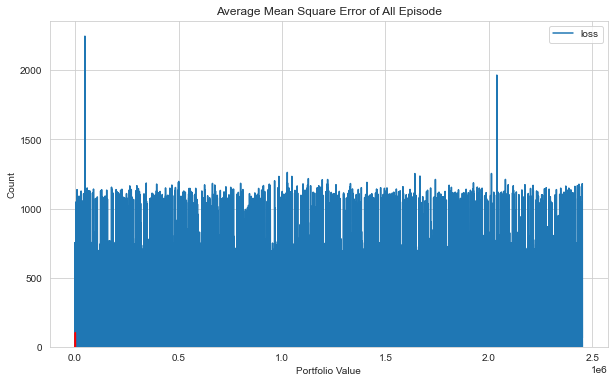

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

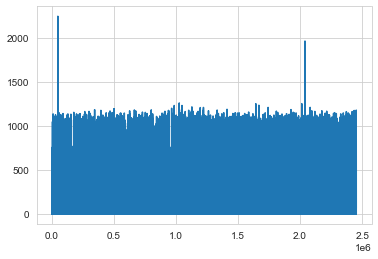

In [5]:
plt.plot(agent.model.losses)

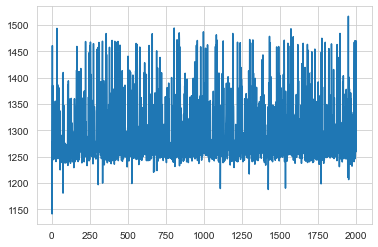

In [6]:
plt.plot(portfolio_value)

episode end value: 1236.60, duration: 0:00:00.135951
Sell: 373 times, Buy: 356 times


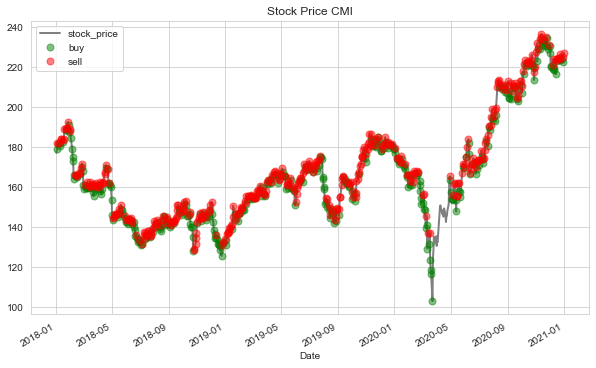

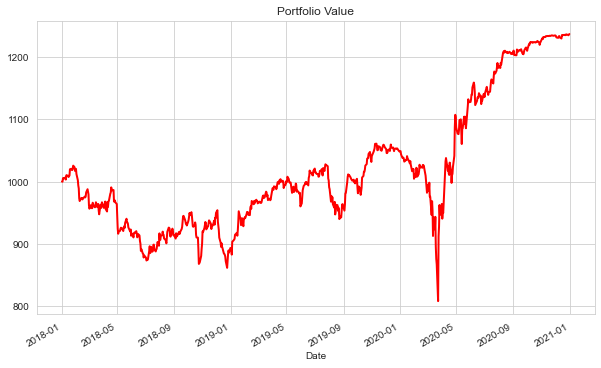

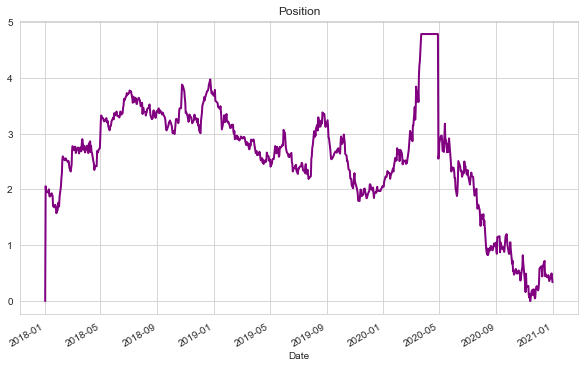

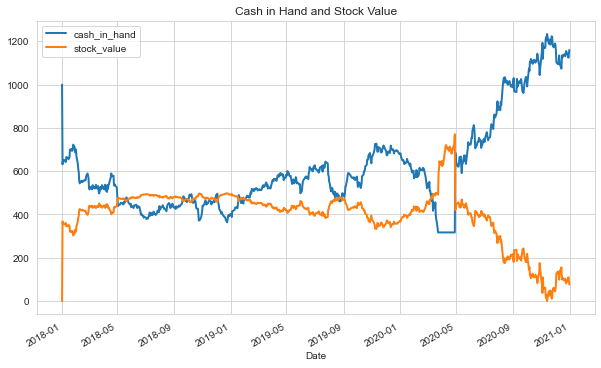

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CMI
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 7.34 %
Volatility: 0.1568
shape ratio: 0.3976
Maximun drawdown: -23.78 %
Calmar ratio: 0.3084
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 8.65 %
Volatility (benchmark): 0.3190
shape ratio: 0.2367
Maximun drawdown: -46.62 %
Calmar ratio (benchmark): 0.1856


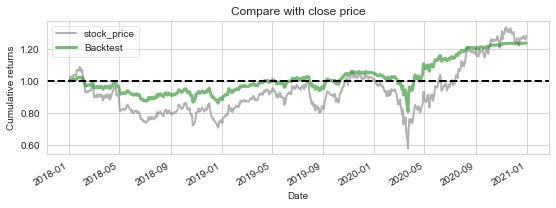

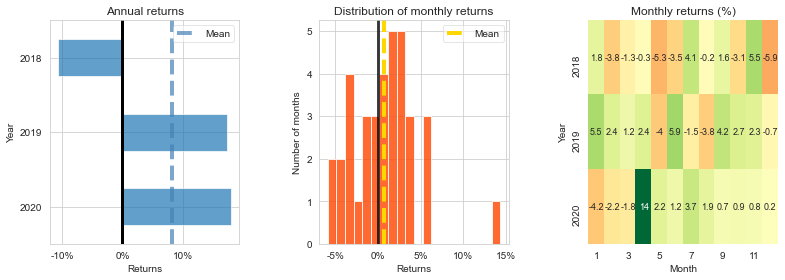

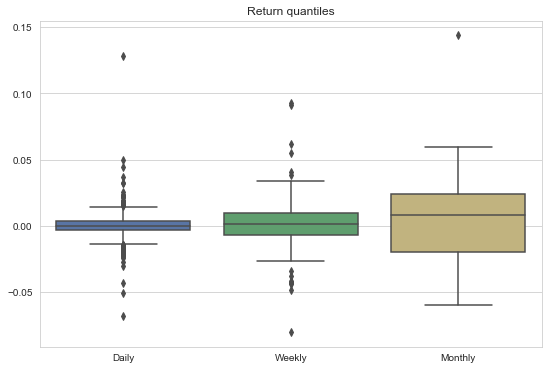

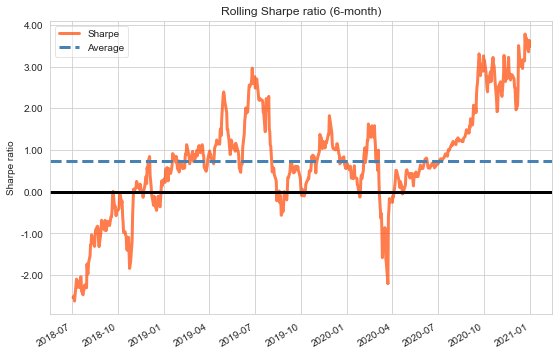

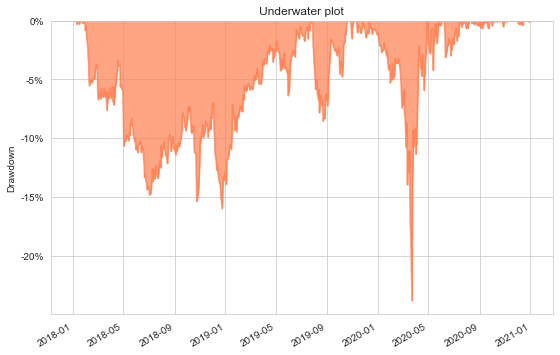

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')